## Logistic Regression

**Logistic Regression** is a classic Machine Learning algorithm for classification problems. **Logistic Regression** can also be thought of as a basic building block of ANNs. In this notebook we will implement logistic regression as a building block of ANNs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Make a fake dataset
from sklearn import datasets
(X, y) = datasets.make_classification(n_samples=10000, n_features=5, n_informative=3)

In [31]:
#Split in test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1, -1)

In [32]:
print("Train samples", X_train.shape[1])
print("Test samples", X_test.shape[1])
print("Features",X_test.shape[0])
print("X shape",X_train.shape)
print("y shape",y_train.shape)

Train samples 8000
Test samples 2000
Features 5
X shape (5, 8000)
y shape (1, 8000)


In [33]:
#Lets implement the sigmoid function
def sigmoid(x):
  return (1.0/(1.0+np.exp(-x)))


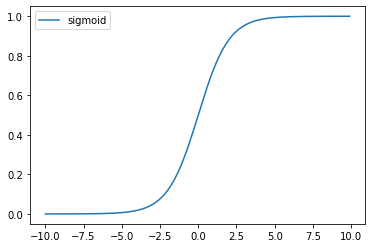

In [34]:
x = np.arange(-10,10,0.1)
z = sigmoid(x)

plt.plot(x, z, label='sigmoid')
plt.legend()

In [36]:
#initialize weights and biases
def initialize(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

Forward Propagation:
- We compute activation as $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- We calculate the cost function as: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Backward gradient step:

$$\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)}$$

In [47]:
#forward propogate and calculate gradients
def forward_and_backward(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)                
    cost = -1*(Y*np.log(A)+(1-Y)*np.log(1-A)).sum()/m  
   
    #calculate gradient
    dw = np.dot(X,(A-Y).T)/m
    db = (A-Y).sum()/m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [48]:
#Optrimize the cost function using batch gradient descent
def optimize(w, b, X, Y, num_iterations, learning_rate):  
    costs = []
    for i in range(num_iterations):
        grads, cost = forward_and_backward(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [52]:
#Predict 
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if(A[0,i] > 0.5):
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0    
    return Y_prediction

In [53]:
#Putting it all together
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [57]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 20000, learning_rate = 0.005)

train accuracy: 88.9375 %
test accuracy: 88.6 %


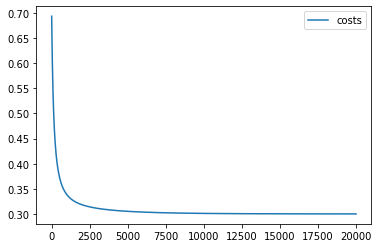

In [58]:
plt.plot(d["costs"], label='costs')
plt.legend()